In [ ]:
# Logistic Regression using NBA dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
df = pd.read_csv('nbastats.csv')
print(df.head(5))

   Game  Home WINorLOSS  TeamPoints  OpponentPoints  FieldGoals  \
0     1  Away         L         102             109          40   
1     2  Home         W         102              92          35   
2     3  Away         L          92              94          38   
3     4  Away         L         119             122          43   
4     5  Home         W         103              96          33   

   FieldGoalsAttempted  FieldGoals.  X3PointShots  X3PointShotsAttempted  ...  \
0                   80        0.500            13                     22  ...   
1                   69        0.507             7                     20  ...   
2                   92        0.413             8                     25  ...   
3                   93        0.462            13                     33  ...   
4                   81        0.407             9                     22  ...   

   Opp.FreeThrows  Opp.FreeThrowsAttempted  Opp.FreeThrows.  Opp.OffRebounds  \
0              27             

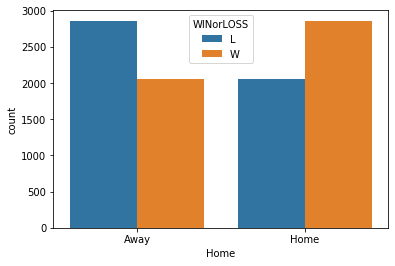

In [6]:
sns.countplot('Home', hue='WINorLOSS', data=df)
plt.show()

In [7]:
print(df.isnull().sum())

Game                        0
Home                        0
WINorLOSS                   0
TeamPoints                  0
OpponentPoints              0
FieldGoals                  0
FieldGoalsAttempted         0
FieldGoals.                 0
X3PointShots                0
X3PointShotsAttempted       0
X3PointShots.               0
FreeThrows                  0
FreeThrowsAttempted         0
FreeThrows.                 0
OffRebounds                 0
TotalRebounds               0
Assists                     0
Steals                      0
Blocks                      0
Turnovers                   0
TotalFouls                  0
Opp.FieldGoals              0
Opp.FieldGoalsAttempted     0
Opp.FieldGoals.             0
Opp.3PointShots             0
Opp.3PointShotsAttempted    0
Opp.3PointShots.            0
Opp.FreeThrows              0
Opp.FreeThrowsAttempted     0
Opp.FreeThrows.             0
Opp.OffRebounds             0
Opp.TotalRebounds           0
Opp.Assists                 0
Opp.Steals

In [8]:
# pandas drop columns using list of column names
df=df.drop(['Game'], axis=1)

In [9]:
df.head()

,Home,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,Away,L,102,109,40,80,0.500,13,22,0.591,...,27,33,0.818,16,48,26,13,9,9,22
1,Home,W,102,92,35,69,0.507,7,20,0.350,...,18,21,0.857,11,44,25,5,5,18,26
2,Away,L,92,94,38,92,0.413,8,25,0.320,...,27,38,0.711,11,50,25,7,9,19,15
3,Away,L,119,122,43,93,0.462,13,33,0.394,...,20,27,0.741,11,51,31,6,7,19,30
4,Home,W,103,96,33,81,0.407,9,22,0.409,...,8,11,0.727,13,44,26,2,6,15,29


In [11]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df['Home'])
list(le.classes_)
dfn=le.transform(df['Home'])
df['Home']=dfn
df.head()

,Home,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,0,L,102,109,40,80,0.500,13,22,0.591,...,27,33,0.818,16,48,26,13,9,9,22
1,1,W,102,92,35,69,0.507,7,20,0.350,...,18,21,0.857,11,44,25,5,5,18,26
2,0,L,92,94,38,92,0.413,8,25,0.320,...,27,38,0.711,11,50,25,7,9,19,15
3,0,L,119,122,43,93,0.462,13,33,0.394,...,20,27,0.741,11,51,31,6,7,19,30
4,1,W,103,96,33,81,0.407,9,22,0.409,...,8,11,0.727,13,44,26,2,6,15,29


In [12]:
df=pd.get_dummies(df)
df.head()

,Home,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,...,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,WINorLOSS_L,WINorLOSS_W
0,0,102,109,40,80,0.500,13,22,0.591,9,...,0.818,16,48,26,13,9,9,22,1,0
1,1,102,92,35,69,0.507,7,20,0.350,25,...,0.857,11,44,25,5,5,18,26,0,1
2,0,92,94,38,92,0.413,8,25,0.320,8,...,0.711,11,50,25,7,9,19,15,1,0
3,0,119,122,43,93,0.462,13,33,0.394,20,...,0.741,11,51,31,6,7,19,30,1,0
4,1,103,96,33,81,0.407,9,22,0.409,28,...,0.727,13,44,26,2,6,15,29,0,1


In [15]:



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
 
x = df.drop('Home', axis=1)
y = df['Home']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))


             precision    recall  f1-score   support

          0       0.61      0.61      0.61      1616
          1       0.61      0.62      0.62      1632

avg / total       0.61      0.61      0.61      3248

[[ 981  635]
 [ 625 1007]]
0.6120689655172413
